In [1]:
!git clone https://github.com/bhavita/CovidPrediction

Cloning into 'CovidPrediction'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 326 (delta 4), reused 0 (delta 0), pack-reused 310
Receiving objects: 100% (326/326), 138.16 MiB | 35.12 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Checking out files: 100% (288/288), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image
import os


In [3]:
DATASET_PATH = "CovidPrediction/CovidDataset"
TRAINING_DATASET_PATH=DATASET_PATH + "/Train"
VALIDATION_DATASET_PATH=DATASET_PATH + "/Val"
UPLOAD_CONTENT_PATH="CovidPrediction/Content/"

In [4]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [6]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(TRAINING_DATASET_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.


In [8]:
CLASSES = train_generator.class_indices
print(CLASSES)


{'Covid': 0, 'Normal': 1}


In [9]:
validation_generator = test_dataset.flow_from_directory(VALIDATION_DATASET_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [23]:
hist = model.fit(
    train_generator,
    steps_per_epoch=7,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/15
7/7 [==============================] - 60s 9s/step - loss: 0.1886 - accuracy: 0.9464 - val_loss: 0.0780 - val_accuracy: 0.9667
Epoch 2/15
7/7 [==============================] - 62s 9s/step - loss: 0.1463 - accuracy: 0.9509 - val_loss: 0.1933 - val_accuracy: 0.9667
Epoch 3/15
7/7 [==============================] - 59s 8s/step - loss: 0.1056 - accuracy: 0.9643 - val_loss: 0.0886 - val_accuracy: 0.9833
Epoch 4/15
7/7 [==============================] - 59s 8s/step - loss: 0.0941 - accuracy: 0.9643 - val_loss: 0.0512 - val_accuracy: 1.0000
Epoch 5/15
7/7 [==============================] - 59s 8s/step - loss: 0.0534 - accuracy: 0.9732 - val_loss: 0.0521 - val_accuracy: 0.9667
Epoch 6/15
7/7 [==============================] - 59s 8s/step - loss: 0.0768 - accuracy: 0.9866 - val_loss: 0.0718 - val_accuracy: 0.9667
Epoch 7/15
7/7 [==============================] - 58s 8s/step - loss: 0.1049 - accuracy: 0.9688 - val_loss: 0.0469 - val_accuracy: 1.0000
Epoch 8/15
7/7 [==================

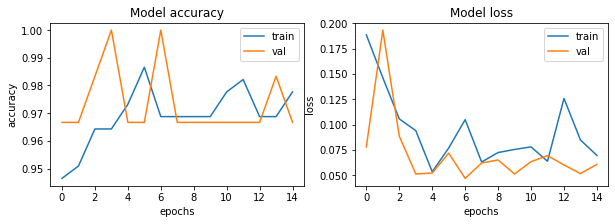

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(hist.history[met])
    ax[i].plot(hist.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

Saving COVID-Sample.jpeg to COVID-Sample.jpeg
Saving NORMAL-Sample.jpeg to NORMAL-Sample.jpeg
Originally -COVID-Sample.jpeg, Predicted  - Covid
Originally -NORMAL-Sample.jpeg, Predicted  - Normal


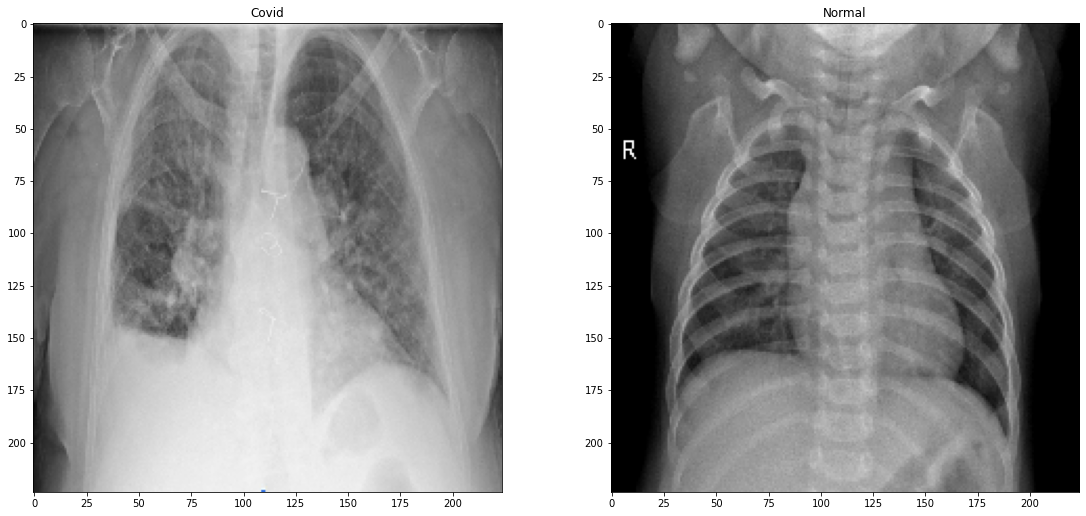

In [22]:
from google.colab import files
from matplotlib import pyplot as plt
import cv2

uploaded = files.upload()
f = plt.figure(figsize=(50,50)) # specifying the overall grid size
i=1

for fn in uploaded.keys():
  # predict images
  path = "/content/" + fn
  img = image.load_img(path, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis =0)
  images = np.vstack([x])
  prediction = model.predict(images, batch_size = 10)
  predicted_class_indices= int(prediction[0][0])
  predicted_type = list(CLASSES.keys())[list(CLASSES.values()).index(predicted_class_indices)]
  f.add_subplot(5,5,i);
  i=i+1;
  print("Originally -" + fn + ", Predicted  - "+predicted_type)
  plt.title(predicted_type)
  plt.imshow(img)


plt.show(block=True)
 
